<a href="https://colab.research.google.com/github/kayahardie/PartIIIProject/blob/main/Submit_Automate_copy_for_runs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
from numpy import pi
import itertools
from numpy import linalg as LA
from scipy import stats
from scipy import optimize
import multiprocessing as mp
import shutil
import subprocess as sp
import math
from statsmodels.iolib.table import SimpleTable, default_txt_fmt

In [ ]:
# Working directory
Lassi_home = r'/content/drive/MyDrive/transition_temp_2_chain'
Sim_home = Lassi_home
%cd $Lassi_home


/content/drive/MyDrive/transition_temp_2_chain


In [ ]:
# Generates entries in a structure file from sticker positions (assuming constant linker length between all beads)
def struc_gen(sticker_pos, chain_l, linker_l):
    struc = np.zeros((2*chain_l-2,4), dtype=int)
    struc.T[0] = np.append([0], np.append(np.repeat(np.arange(1,chain_l-1),2),[chain_l-1]))
    struc.T[2] = np.repeat(linker_l, 2*chain_l-2)

    types = np.zeros(2*chain_l-2, dtype=int)
    if 0 in sticker_pos:
        types[0] = 1
    if chain_l-1 in sticker_pos:
        types[-1] = 1
    for i in sticker_pos:
        if i != 0 and i != chain_l-1:
            types[2*i-1] = 1
            types[2*i] = 1
    struc.T[1] = types

    bonds = np.zeros(2*chain_l-4, dtype=int)
    for i in range(0,chain_l-2):
        bonds[2*i] = i
        bonds[2*i+1] = i+2
    bonds = np.append([1], np.append(bonds,[chain_l-2]))
    struc.T[3] = bonds
    return struc

In [ ]:
shift = 'no'
seq_info = "yes"
many_chains = 'yes'

In [ ]:
if shift  == "no":
    if many_chains == "yes":
        same_chains = "no"
        chain_n = 2
        chain_l = int(input("Enter the chain length: "))
        n = int(input("Enter the number of sequences to generate: "))
        sequence_l = int(input("Enter the number of stickers: "))

        seqs = {}  # Initialize an empty dictionary to store the sequences

        # Loop to input n sequences
        for i in range(n):
            print(f"Enter sticker locations {i + 1} (separated by spaces, 0 is the first position):")
            user_input = input().split()

            # Convert user input to integers and add to the sequence
            sequence_i = [int(value) for value in user_input]

            # Check if the user provided the correct number of values
            if len(sequence_i) != sequence_l:
                print(f"Error: Sequence {i + 1} must have exactly {sequence_l} values.")
            else:
                seqs[f"Sequence_{i + 1}"] = sequence_i  # Assign the generated sequence to the dictionary

        # Print the generated sequences
        for sequence_name, sequence in seqs.items():
            print(f"{sequence_name}: {sequence}")


Enter the chain length: 30
Enter the number of sequences to generate: 10
Enter the number of stickers: 10
Enter sticker locations 1 (separated by spaces, 0 is the first position):
0 1 2 3 4 5 6 7 8 9
Enter sticker locations 2 (separated by spaces, 0 is the first position):
0 2 4 6 8 10 12 14 16 18
Enter sticker locations 3 (separated by spaces, 0 is the first position):
0 3 6 9 12 15 18 21 24 27
Enter sticker locations 4 (separated by spaces, 0 is the first position):
0 1 2 3 4 25 26 27 28 29
Enter sticker locations 5 (separated by spaces, 0 is the first position):
0 1 8 9 15 16 17 18 19 20
Enter sticker locations 6 (separated by spaces, 0 is the first position):
10 11 12 13 14 15 16 17 18 19
Enter sticker locations 7 (separated by spaces, 0 is the first position):
6 7 8 9 10 24 25 26 27 28
Enter sticker locations 8 (separated by spaces, 0 is the first position):
0 4 7 11 15 18 2125 27 28
Error: Sequence 8 must have exactly 10 values.
Enter sticker locations 9 (separated by spaces, 0 i

In [ ]:
seqs = {'Sequence_1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'Sequence_2': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18], 'Sequence_3': [0, 3, 6, 9, 12, 15, 18, 21, 24, 27], 'Sequence_4': [0, 1, 2, 3, 4, 25, 26, 27, 28, 29], 'Sequence_5': [0, 1, 8, 9, 15, 16, 17, 18, 19, 20], 'Sequence_6': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'Sequence_7': [6, 7, 8, 9, 10, 24, 25, 26, 27, 28], 'Sequence_8': [0, 4, 7, 11, 15, 18, 21, 25, 27, 28], 'Sequence_9': [4, 6, 10, 19, 21, 24, 26, 27, 28, 29], 'Sequence_10': [0, 3, 9, 12, 17, 18, 21, 24, 27, 29]}

{'Sequence_1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'Sequence_2': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18], 'Sequence_3': [0, 3, 6, 9, 12, 15, 18, 21, 24, 27], 'Sequence_4': [0, 1, 2, 3, 4, 25, 26, 27, 28, 29], 'Sequence_5': [0, 1, 8, 9, 15, 16, 17, 18, 19, 20], 'Sequence_6': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'Sequence_7': [6, 7, 8, 9, 10, 24, 25, 26, 27, 28], 'Sequence_9': [4, 6, 10, 19, 21, 24, 26, 27, 28, 29], 'Sequence_10': [0, 3, 9, 12, 17, 18, 21, 24, 27, 29]}


Generate directories and structure files for simulations that involve one type of chain

In [ ]:
# Chains directories
linker_l = 1

sim_dirs = []

# If do not need a bound unbound % curve
if seq_info == "no":
    overall_dir = 'Length_'+str(chain_l)+'_Stickers_'+str(sequence_l)+'_Chains_'+str(chain_n)+'_Linker_'+str(linker_l)
    sim_dirs.append(overall_dir)
    try:
        os.mkdir(overall_dir)
        print('Directory: '+overall_dir+' created')
    except FileExistsError:
        print('Directory: '+overall_dir+' exists')

    for i in list(seqs):
        new_dir = f'{overall_dir}/{i}'
        sim_dirs.append(new_dir)
        try:
            os.mkdir(new_dir)
            print(f'Directory: {new_dir} created within {overall_dir}')
        except FileExistsError:
            print(f'Directory: {new_dir} exists within {overall_dir}')

#To get bound unbound % curve
if seq_info == "yes":
    overall_dir = 'BUB_'+str(n)+'_Length_'+str(chain_l)+'_Stickers_'+str(sequence_l)+'_Chains_'+str(chain_n)+'_Linker_'+str(linker_l)
    sim_dirs.append(overall_dir)
    try:
        os.mkdir(overall_dir)
        print('Directory: '+overall_dir+' created')
    except FileExistsError:
        print('Directory: '+overall_dir+' exists')

    for i in list(seqs):
        new_dir = f'{overall_dir}/{i}'
        sim_dirs.append(new_dir)
        try:
            os.mkdir(new_dir)
            print(f'Directory: {new_dir} created within {overall_dir}')
        except FileExistsError:
            print(f'Directory: {new_dir} exists within {overall_dir}')

        for j in range(1, runs_n + 1):
            new_dir_2 = f'{new_dir}/Run_{j}'
            sim_dirs.append(new_dir_2)
            try:
                os.mkdir(new_dir_2)
                print(f'Directory: {new_dir_2} created within {new_dir}')
            except FileExistsError:
                print(f'Directory: {new_dir_2} exists within {new_dir}')

Directory: Length_13_Stickers_3_Chains_1_Linker_1 created
Directory: Length_13_Stickers_3_Chains_1_Linker_1/Sequence_1 created within Length_13_Stickers_3_Chains_1_Linker_1
Directory: Length_13_Stickers_3_Chains_1_Linker_1/Sequence_2 created within Length_13_Stickers_3_Chains_1_Linker_1
Directory: Length_13_Stickers_3_Chains_1_Linker_1/Sequence_3 created within Length_13_Stickers_3_Chains_1_Linker_1
Directory: Length_13_Stickers_3_Chains_1_Linker_1/Sequence_4 created within Length_13_Stickers_3_Chains_1_Linker_1
Directory: Length_13_Stickers_3_Chains_1_Linker_1/Sequence_5 created within Length_13_Stickers_3_Chains_1_Linker_1
Directory: Length_13_Stickers_3_Chains_1_Linker_1/Sequence_6 created within Length_13_Stickers_3_Chains_1_Linker_1


In [ ]:
# Generates structure files for each sequence
#Single molecule
if many_chains == "no":
    for i in list(seqs):
        new_dir = f'{overall_dir}/{i}'
        new_structure_file = new_dir+'/structure.prm'
        struc = struc_gen(seqs[i], chain_l, linker_l)
        with open(new_structure_file,'w') as struc_file:
            struc_file.write('NEW{\n'+str(chain_n)+'\n')
            np.savetxt(struc_file, struc.astype(int),fmt='%s')
            struc_file.write('}END')

#Many molecules with the SAME sequences BUB curve NOT required
if many_chains == same_chains == "yes" and seq_info =="no":
    for i in list(seqs):
        new_dir = f'{overall_dir}/{i}'
        new_structure_file = new_dir+'/structure.prm'
        struc = struc_gen(seqs[i], chain_l, linker_l)
        with open(new_structure_file,'w') as struc_file:
            struc_file.write(f'NEW{{\n{chain_n}\n')
            np.savetxt(struc_file, struc.astype(int),fmt='%s')
            struc_file.write('}END')

#Many molecules with the SAME sequences BUB REQUIRED
if many_chains == same_chains == seq_info == "yes":
    for i in list(seqs):
        new_dir = f'{overall_dir}/{i}'
        for j in range(1, runs_n + 1):
            new_dir_2 = f'{new_dir}/Run_{j}'
            new_structure_file = new_dir_2+'/structure.prm'
            struc = struc_gen(seqs[i], chain_l, linker_l)
            with open(new_structure_file,'w') as struc_file:
                struc_file.write(f'NEW{{\n{chain_n}\n')
                np.savetxt(struc_file, struc.astype(int),fmt='%s')
                struc_file.write('}END')

#Many molecules with the DIFFERENT sequences DOES NOT WORK
if many_chains == "yes" and same_chains == "no":
    for i in list(seqs):
        new_dir = f'{overall_dir}/{i}'
        new_structure_file = new_dir+'/structure.prm'
        struc = struc_gen(seqs[i], chain_l, linker_l)
        with open(new_structure_file,'w') as struc_file:
            struc_file.write('NEW{\n'+str(chain_n)+'\n')
            np.savetxt(struc_file, struc.astype(int),fmt='%s')
            struc_file.write('}END')
        existing_structure_file = os.path.join(Sim_home, new_structure_file)
        # Open the new structure file in append mode and the existing file in read mode
        with open(new_structure_file, 'a') as new_file, open(existing_structure_file, 'r') as existing_file:
            # Read the content from the existing file
            content = existing_file.read()

            # Append the content to the new file
            new_file.write('\n' + content)

### Structure files involving multiple types of chain

### Generate key files and copy energy file to directories

In [ ]:
# Generates text for all key files, detailing simulation parameters

file_txt = ['# system \nBOX_SIZE ','\n\n# simulation settings\nMC_TEMP','\nN_STEPS','\nPREEQ_STEPS',
            '\nPREEQ_TEMP','\nMC_DELTA_TEMP','\nMC_INVERT_TEMP','\nMC_CYCLE_NUM','\n\nMC_TEMP_MODE','\n\nMC_INDENT_MODE','\nBIAS_INDENT_RADIUS',
            '\nBIAS_INDENT_STIFF','\nBIAS_KEEP_ON','\n\n# MC move frequencies\nMV_STROT_FREQ','\nMV_LOCAL_FREQ','\nMV_COLOCAL_FREQ','\nMV_MTLOCAL_FREQ',
            '\nMV_SNAKE_FREQ','\nMV_TRANS_FREQ','\nMV_SMCLSTR_FREQ','\nMV_CLSTR_FREQ','\nMV_PIVOT_FREQ','\nMV_BRROT_FREQ','\nMV_DBPVT_FREQ','\nMV_PR_SMCLSTR',
            '\n\n# external files\nSTRUCT_FILETYPE','\nSTRUCT_FILE','\nRESTART_FILE','\nENERGY_FILE',
            '\n\n# RNG Seed 0 means pick a random seed, otherwise the number is the seed. The used seed is outputted in the log regardless\nRANDOM_SEED',
            '\n\n# report\nREPORT_PREFIX','\nREPORT_LOG_FREQ','\nREPORT_ENERGY_FREQ','\nREPORT_CONFIG_FREQ','\nREPORT_MCMOVE_FREQ',
            '\n\n# The following analyses only occur in  the last half of every MC annealing cycle.\nREPORT_NETWORK_FREQ','\nREPORT_RDFTOT_FREQ','\nREPORT_COMDEN_FREQ',
            '\n\nANALYSIS_CLUSTER_MODE','\nREPORT_CONFIG_MODE']

key = {}

Q = input("Do you want to change the settings of the param.key file from the default? (yes/no) Currently the number of cycles = 5, number of steps per cycle = 2,000,000, starting temperature = 1.0 and the temperature reduction is -0.2")

if many_chains == "no":
    if Q.lower() == "yes":
        # Code to change the settings of the param.key file
        cycle_n = int(input("Enter the number of cycles: "))
        equilibrium = 1000000
        timestep_param = 50000
        cycle_steps = int(input("Enter the number of steps per cycle: "))
        box_size =  200
        starting_temp = (input("Enter the starting temperature: "))

        parameters = [box_size,                                                       # Box size
                  starting_temp, cycle_steps, equilibrium, 1000.0, -0.2, 0, cycle_n,                             # Temp, N_steps, pre-eq steps, pre-eq Temp, dTemp, iTemp, cycle number
                  3, -1, 20.0, 100.0, 1,                                         # Temp mode, indent mode, rotational energy bias
                  0.0, 3.0, 0.5, 1.0, 0.1, 0.1, 0.05, 0.005, 0.5, 0.0, 0.5, 0.05,  # Move frequencies
                  0, 'structure.prm', 'DUMM', 'energy.prm',                  # External files
                  0,                                                         # RNG seed
                  'results', timestep_param, timestep_param, timestep_param, timestep_param, 0, 0, 0,                   # Reporting frequencies
                  2, 0]                                                      # Analysis cluster mode, report configuration mode
        for i in range(len(file_txt)):
            key[file_txt[i]] = parameters[i]
        print("You chose to change the settings.")
    elif Q.lower() == "no":
        # Code for the "else" case
        cycle_n = 5
        equilibrium = 1000000
        timestep_param = 50000
        cycle_steps = 2000000
        box_size = 200
        starting_temp = 1.0

        parameters = [box_size,                                                       # Box size
                  starting_temp, cycle_steps, equilibrium, 1000.0, -0.2, 0, cycle_n,                             # Temp, N_steps, pre-eq steps, pre-eq Temp, dTemp, iTemp, cycle number
                  3, -1, 20.0, 100.0, 1,                                         # Temp mode, indent mode, rotational energy bias
                  0.0, 3.0, 0.5, 1.0, 0.1, 0.1, 0.05, 0.005, 0.5, 0.0, 0.5, 0.05,  # Move frequencies
                  0, 'structure.prm', 'DUMM', 'energy.prm',                  # External files
                  0,                                                         # RNG seed
                  'results', timestep_param, timestep_param, timestep_param, timestep_param, 0, 0, 0,                   # Reporting frequencies
                  2, 0]                                                      # Analysis cluster mode, report configuration mode
        for i in range(len(file_txt)):
            key[file_txt[i]] = parameters[i]
        print("You chose not to change the settings.")
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")

if many_chains == "yes":
    if Q.lower() == "yes":
        # Code to change the settings of the param.key file
        cycle_n = int(input("Enter the number of cycles: "))
        equilibrium = 10000000
        timestep_param = 50000
        cycle_steps = int(input("Enter the number of steps per cycle: "))
        box_size = 80
        #box_size = int(input("Enter the box size: "))
        starting_temp = (input("Enter the starting temperature: "))
        #temp_jump_sim = int(input("Enter the temp jump: "))

        parameters = [box_size,                                                       # Box size
                  starting_temp, cycle_steps, equilibrium, 1000.0, -0.2, 0, cycle_n,                             # Temp, N_steps, pre-eq steps, pre-eq Temp, dTemp, iTemp, cycle number
                  3, -1, 20.0, 100.0, 1,                                         # Temp mode, indent mode, rotational energy bias
                  0.0, 3.0, 0.5, 1.0, 0.1, 0.1, 0.05, 0.005, 0.5, 0.0, 0.5, 0.05,  # Move frequencies
                  0, 'structure.prm', 'DUMM', 'energy.prm',                  # External files
                  0,                                                         # RNG seed
                  'results', timestep_param, timestep_param, timestep_param, timestep_param, 0, 0, 0,                   # Reporting frequencies
                  2, 0]                                                    # Analysis cluster mode, report configuration mode
        for i in range(len(file_txt)):
            key[file_txt[i]] = parameters[i]
        print("You chose to change the settings.")
    elif Q.lower() == "no":
        # Code for the "else" case
        cycle_n = 5
        equilibrium = 1000000
        timestep_param = 50000
        cycle_steps = 2000000
        box_size = 80
        starting_temp = 1.0

        parameters = [box_size,                                                       # Box size
                  starting_temp, cycle_steps, equilibrium, 1000.0, -0.2, 0, cycle_n,                             # Temp, N_steps, pre-eq steps, pre-eq Temp, dTemp, iTemp, cycle number
                  3, -1, 20.0, 100.0, 1,                                         # Temp mode, indent mode, rotational energy bias
                  0.0, 3.0, 0.5, 1.0, 0.1, 0.1, 0.05, 0.005, 0.5, 0.0, 0.5, 0.05,  # Move frequencies
                  0, 'structure.prm', 'DUMM', 'energy.prm',                  # External files
                  0,                                                         # RNG seed
                  'results', timestep_param, timestep_param, timestep_param, timestep_param, 0, 0, 0,                   # Reporting frequencies
                  2, 0]
        for i in range(len(file_txt)):
            key[file_txt[i]] = parameters[i]
        print("You chose not to change the settings.")
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")



Do you want to change the settings of the param.key file from the default? (yes/no) Currently the number of cycles = 5, number of steps per cycle = 2,000,000, starting temperature = 1.0 and the temperature reduction is -0.2yes
Enter the number of cycles: 100
Enter the number of steps per cycle: 60000000
Enter the starting temperature: 2.0
You chose to change the settings.


In [ ]:
# Adds details for each individual simulation into each key file, and generaters a random seed for each

rng = np.random.default_rng()

for sim_dir in sim_dirs:                                       # Generate all key files
    key_text = '# Key file\n'

    #chain_types = sim_dir.split('/')
    #print(chain_types)
    report_prefix = 'results'
    #for num in chain_types:
        #report_prefix += 'Lassi_final_results'
    key['\n\n# Reporting and analysis\nREPORT_PREFIX'] = report_prefix

    key['\n\n# RNG Seed 0 means pick a random seed, otherwise the number is the seed. The used seed is outputted in the log regardless\nRANDOM_SEED'] = int(np.trunc(1e8*rng.random()))

    for j in list(key):
        key_text += j + '    ' + str(key[j])

    new_key_file = sim_dir+'/param.key'
    with open(new_key_file,'w') as key_file:
        key_file.write(key_text)

In [ ]:
if many_chains == "yes":
    for new_dir in sim_dirs:
        shutil.copyfile('energy.prm', os.path.join(Sim_home, new_dir, 'energy.prm'))
if many_chains == "no":
    for new_dir in sim_dirs:
        shutil.copyfile('energy.prm', os.path.join(Sim_home, new_dir, 'energy.prm'))

In [ ]:
# Iterate over the simulation directories
#for new_dir in sim_dirs:
   # energy_file_path = os.path.join(Sim_home, new_dir, 'energy.prm')

    # Check if the energy file already exists in the destination directory
    #if not os.path.exists(energy_file_path):
        # Copy the energy file from the overall directory
        #shutil.copyfile('energy.prm', energy_file_path)

        # Changing the number of stickers and the linker length
       # with open(energy_file_path, 'r') as file:
          #  lines = file.readlines()

        #delete_next_line = False

        # Find and replace the lines with the new values
       # for i, line in enumerate(lines):
            #if delete_next_line:
              #  del lines[i]
              #  delete_next_line = False
         #   elif '#LINKER_LENGTH' in line:
             #   lines[i] = f'#LINKER_LENGTH\n{linker_l}\n'
               # delete_next_line = True

        # Open the file again in write mode and save the changes
       # with open(energy_file_path, 'w') as file:
           # file.writelines(lines)


In [ ]:
# Copies Lassi file from overall directory
for new_dir in sim_dirs:
    lassi_file_path = os.path.join(Sim_home, new_dir, 'lassi')

    # Check if the Lassi file already exists in the destination directory
    if not os.path.exists(lassi_file_path):
        # Copy the Lassi file from the overall directory
        shutil.copyfile('lassi', lassi_file_path)

### Running the simulations

In [ ]:
shuff = [1, 2, 3, 4, 5, 6]
for i in shuff:
    path = f'/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_{i}'
    path_lassi = f'{path}/lassi'
    %cd $path
    !chmod +x lassi
    ! $path_lassi

    print("Lassi has finished running")

Multi chain cluster analysis

Generating individual plots for each sequence - N STICKERS / 2 CHAINS

In [ ]:
for i in list(seqs): #setting working directory
    running_dir = os.path.join(Sim_home, overall_dir, i)
    os.chdir(running_dir)
    file = 'results_trj.lammpstrj'

    T = []

    # Create a dictionary of empty lists for the stickers
    sticker_dict = {f'sticker_{y}': [] for y in range(sequence_l)}

    sequence_data = seqs[i]

    with open(file) as trj:

        tot_file = trj.readlines()
        tot_file = iter(tot_file)

        for a_line in tot_file:

            if a_line == 'ITEM: TIMESTEP\n':                   # Record timesteps
                a_line = next(tot_file)
                timestep = int(a_line[:-1])
                T.append(timestep)

            if sequence_data[0] == 0:
                if a_line == 'ITEM: ATOMS id type mol x y z bP\n':
                    a_line = next(tot_file)
                    m_line = a_line.split(" ")
                    sticker_dict['sticker_0'].append(int(m_line[-1]))
            else:
                if a_line.split(" ")[0] == str(sequence_data[0]):
                    m_line = a_line.split(" ")
                    sticker_dict['sticker_0'].append(int(m_line[-1]))

            for k in range(1, sequence_l):
                sticker_index_num = k  # This should be the index you want to use as the key
                sticker_index = f'sticker_{sticker_index_num}'

                if a_line.split(" ")[0] == str(sequence_data[k]):
                    m_line = a_line.split(" ")
                    sticker_dict[sticker_index].append(int(m_line[-1]))


TypeError: can only concatenate str (not "int") to str

Generating individual plots for each sequence - N STICKERS / 1 CHAIN

Sequence_1


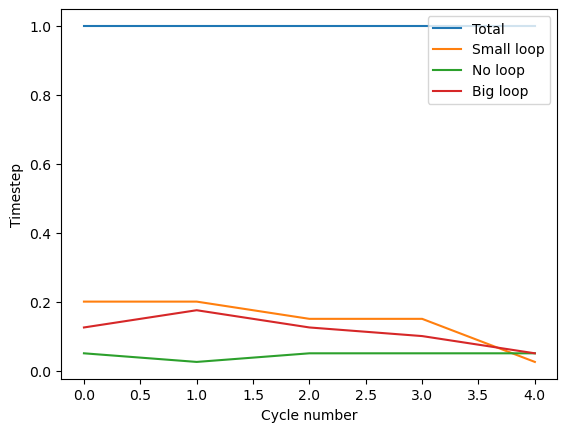

In [ ]:
for i in list(seqs): #settinig working directory
    running_dir = os.path.join(Sim_home, overall_dir, i)
    os.chdir(running_dir)
    file = 'results_trj.lammpstrj'

    T = []

    # Create a dictionary of empty lists for the stickers
    sticker_dict = {f'sticker_{y}': [] for y in range(sequence_l)}

    sequence_data = seqs[i]

    with open(file) as trj:

        tot_file = trj.readlines()
        tot_file = iter(tot_file)

        for a_line in tot_file:

            if a_line == 'ITEM: TIMESTEP\n':                   # Record timesteps
                a_line = next(tot_file)
                timestep = int(a_line[:-1])
                T.append(timestep)

            if sequence_data[0] == 0:
                if a_line == 'ITEM: ATOMS id type mol x y z bP\n':
                    a_line = next(tot_file)
                    m_line = a_line.split(" ")
                    sticker_dict['sticker_0'].append(int(m_line[-1]))
            else:
                if a_line.split(" ")[0] == str(sequence_data[0]):
                    m_line = a_line.split(" ")
                    sticker_dict['sticker_0'].append(int(m_line[-1]))

            for k in range(1, sequence_l):
                sticker_index_num = k  # This should be the index you want to use as the key
                sticker_index = f'sticker_{sticker_index_num}'

                if a_line.split(" ")[0] == str(sequence_data[k]):
                    m_line = a_line.split(" ")
                    sticker_dict[sticker_index].append(int(m_line[-1]))


    # Convert each sticker in sticker_dict into a NumPy array
    for sticker_key in sticker_dict.keys():
        sticker_dict[sticker_key] = np.array(sticker_dict[sticker_key])

    section_index = (np.array(T)//timestep_param - equilibrium/timestep_param - 1) // (cycle_steps/timestep_param)
    #Time step between recordings, equillibium time count/time step between recordings, -1, number of counts per temperature

    big = []
    sma = []
    med = []
    noo = []
    tot = []

    filtered_arrays = {}
    connected_arrays = {}

    for j in range(cycle_n):
        _AllLink = (section_index == j)
        tot.append(sum(_AllLink))

    # Iterate through the keys and apply the filtering condition
        for m in range(sequence_l):
            key = f'sticker_{m}'  # Sticker key
            arr = sticker_dict[key]
            boolean_array = arr[_AllLink]
            _filtered_array = (boolean_array != -1)
            filtered_arrays[key] = _filtered_array

        #Big loop - first and last stickers are connected
        last_key = f'sticker_{sequence_l - 1}'
        big_loop = filtered_arrays['sticker_0'] & filtered_arrays[last_key]

        #Small loop - sequential stickers are connected
        sma_loop = np.zeros_like(filtered_arrays['sticker_0'], dtype=bool)  # Initialize sma_loop as an array of False with the same shape as filtered_arrays['sticker_0']

        for m in range(1, sequence_l - 1):  # Exclude the first and last stickers
            key1 = f'sticker_{m - 1}'
            key2 = f'sticker_{m}'
            sma_loop |= (filtered_arrays[key1] & filtered_arrays[key2])  # Perform a bitwise 'and' operation for sequential stickers and 'or' with the existing sma_loop

        #No loop - no stickers are connected
        noo_loop = ~np.any(np.array([filtered_arrays[f'sticker_{z}'] for z in range(sequence_l - 1)]), axis=0)

        # Now, 'sma_loop' contains the cumulative 'and' of sequential filtered arrays where both values are true

        #Medium loop - stickers that are not sequential and also not the first and last are connected
        # Create an empty med_loop array of the same length as the stickers
        med_loop = np.zeros_like(filtered_arrays['sticker_0'], dtype=bool)

        # Check each sticker pair except the first and last
        for x in range(1, sequence_l - 1):
            key1 = f'sticker_{x}'
            key2 = f'sticker_{x + 1}'
            key3 = f'sticker_{sequence_l-1}'

            # Check if both stickers are True and not connected to the first or last sticker
            med_loop_condition = filtered_arrays[key1] & filtered_arrays[key2] & \
                                ~filtered_arrays['sticker_0'] & ~filtered_arrays[key3]

            # Update med_loop with the condition
            med_loop |= med_loop_condition




        big.append(sum(big_loop))
        sma.append(sum(sma_loop))
        med.append(sum(med_loop))
        noo.append(sum(noo_loop))

    #plotting
    plt.figure()
    plt.plot(np.array(tot)/(cycle_steps/timestep_param), label = 'Total')
    plt.plot(np.array(sma)/(cycle_steps/timestep_param), label = 'Small loop')
    plt.plot(np.array(noo)/(cycle_steps/timestep_param), label = 'No loop')
    plt.plot(np.array(big)/(cycle_steps/timestep_param), label = 'Big loop')
    #plt.plot(np.array(med)/(cycle_steps/timestep_param), label = 'Medium loop')
    #Have removed the big and medium loop combined
    #plt.plot(np.array(big)/(cycle_steps/timestep_param) + np.array(med)/(cycle_steps/timestep_param), label = 'big n med loop')

    #Does not plot medium loop if not present (always the case for 3 stickers)
    if any(med):
        plt.plot(np.array(med) / (cycle_steps / timestep_param), label='Medium loop')


    # X and Y-Axis Labels
    plt.xlabel('Cycle number')
    plt.ylabel('Timestep')

    # Legend with 'best' location
    plt.legend(loc='upper right')

    # Title (if needed)
    #plt.title('Your Plot Title')

    # Set a filename based on the value from the 'seqs' dictionary
    print(i)
    name = f'{i}.png'

    # Save the plot with the generated filename
    plt.savefig(name, bbox_inches='tight')





Plotting as one mega plot (does based on saved individual plots) N stickers

C:\Users\kardi\Downloads\Part_III_Project\Lassi_Dao\Automated\100mer_every_10\Length_45_Stickers_8_Chains_79_Linker_1


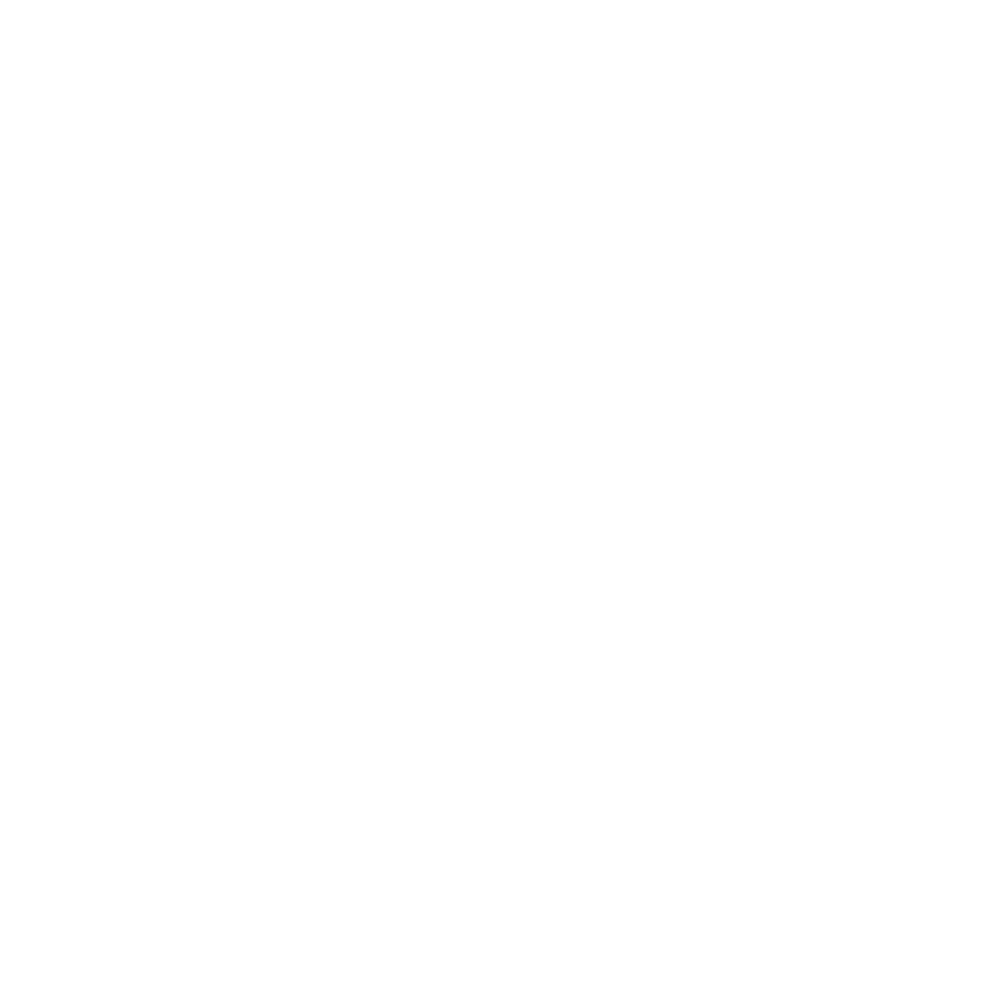

In [ ]:
# Setting working directory
running_dir = os.path.join(Sim_home, overall_dir)
os.chdir(running_dir)
print(running_dir)

# Number of plots you want to have in the array
n_subplots = n

# Calculate the number of rows and columns for the grid
n_cols = math.ceil(math.sqrt(n))  # Number of columns is the square root rounded up
n_rows = math.ceil(n / n_cols)   # Number of rows is n divided by the number of columns (rounded up)


# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, num=n_subplots, figsize=(10, 10))  # Adjust figsize as needed

# Initialize the list to hold image filenames
image_files = []
keys_with_images = []

for i, ax in enumerate(axes.ravel()):
    ax.axis('off')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    if i < len(list(seqs)):
        item_key = list(seqs.keys())[i]
        title = item_key.replace("_", " ")  # Replace underscores with spaces
        folder_name = item_key  # Folder name corresponds to the dictionary key
        image_file = os.path.join(folder_name, f'{item_key}.png')
        if os.path.isfile(image_file):
            img = plt.imread(image_file)
            ax.imshow(img)
            ax.set_title(title)
            image_files.append(image_file)  # Append the filename to the list
            keys_with_images.append(item_key)  # Store the keys with images
        else:
            ax.set_axis_off()  # Turn off axes for empty subplots

# Adjust layout and spacing
plt.tight_layout()

# Set a filename
name = 'Array of all plots.png'

# Save the plot with the generated filename
plt.savefig(name, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
shuff = [1, 2, 3, 4, 5, 6]
for i in shuff:
    path = f'/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_{i}'
    path_lassi = f'{path}/lassi'
    %cd $path
    !chmod +x lassi
    ! $path_lassi

In [ ]:
temps = np.arange(0.02, 2.02, 0.02)
print((temps))

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1  1.12
 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38 1.4
 1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66 1.68
 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94 1.96
 1.98 2.  ]


Generating individual plots for each sequence - 3 STICKERS

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_1
[ 0.  0.  0. ... 99. 99. 99.]
100


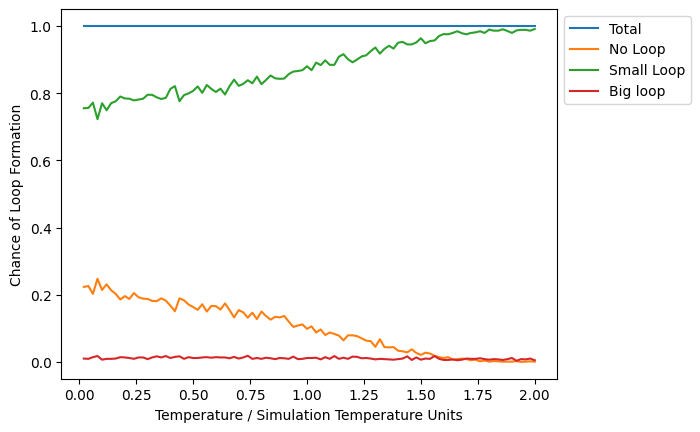

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_2
[ 0.  0.  0. ... 99. 99. 99.]
100


<Figure size 640x480 with 0 Axes>

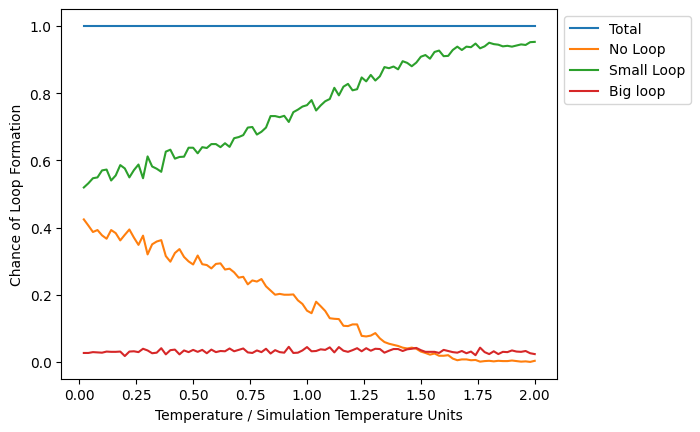

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_3
[ 0.  0.  0. ... 99. 99. 99.]
100


<Figure size 640x480 with 0 Axes>

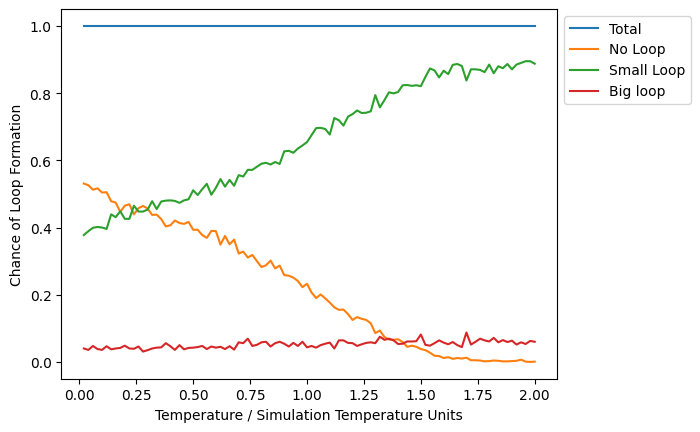

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_4
[ 0.  0.  0. ... 99. 99. 99.]
100


<Figure size 640x480 with 0 Axes>

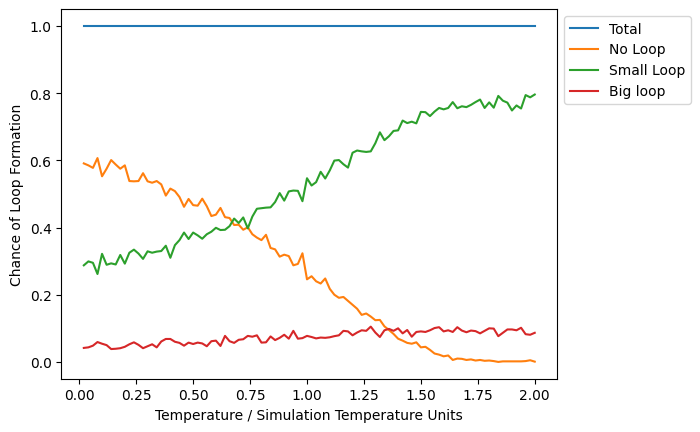

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_5
[ 0.  0.  0. ... 99. 99. 99.]
100


<Figure size 640x480 with 0 Axes>

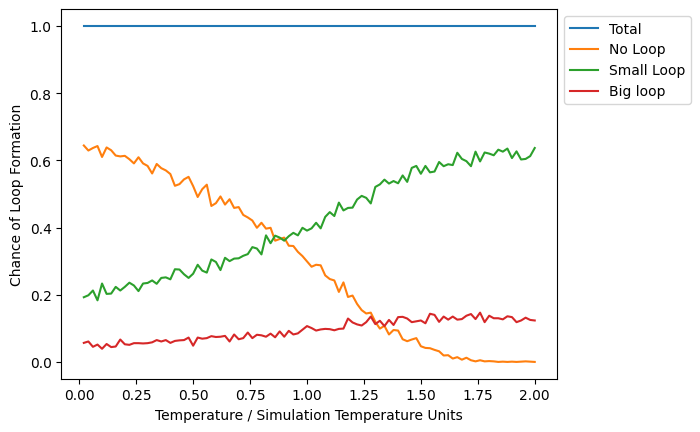

/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_6


FileNotFoundError: [Errno 2] No such file or directory: 'results_trj.lammpstrj'

<Figure size 640x480 with 0 Axes>

In [ ]:
shuff = [1, 2, 3, 4, 5, 6]
for i in shuff:
    path = f'/content/drive/MyDrive/OG_2_CHAIN/Length_13_Stickers_3_Chains_1_Linker_1/Sequence_{i}'
    path_lassi = f'{path}/lassi'
    %cd $path
    file = 'results_trj.lammpstrj'

    T = []
    BegLink = []
    MidLink = []
    EndLink = []

    i = f'Sequence_{i}'
    sequence_data = seqs[i]

    with open(file) as trj:

        tot_file = trj.readlines()
        tot_file = iter(tot_file)

        for a_line in tot_file:

            if a_line == 'ITEM: TIMESTEP\n':                   # Record timesteps
                a_line = next(tot_file)
                timestep = int(a_line[:-1])
                T.append(timestep)

            if a_line == 'ITEM: ATOMS id type mol x y z bP\n': # Record positions and bonds for each time step
                a_line = next(tot_file)
                m_line = a_line.split(" ")
                BegLink.append(int(m_line[-1]))

            if a_line.split(" ")[0] == str(sequence_data[1]):
                m_line = a_line.split(" ")
                MidLink.append(int(m_line[-1]))

            if a_line.split(" ")[0] == str(sequence_data[2]):
                m_line = a_line.split(" ")
                EndLink.append(int(m_line[-1]))

    BegLink = np.array(BegLink)
    MidLink = np.array(MidLink)
    EndLink = np.array(EndLink)

    section_index = (np.array(T)//timestep_param - equilibrium/timestep_param - 1) // (cycle_steps/timestep_param)
    #Time step between recordings, equillibium time count/time step between recordings, -1, number of counts per temperature

    print(section_index)

    big = []
    sma = []
    med = []
    noo = []
    tot = []

    for j in range(cycle_n):

        _AllLink = (section_index == j)
        tot.append(sum(_AllLink))

        _BegLink = BegLink[_AllLink]
        _MidLink = MidLink[_AllLink]
        _EndLink = EndLink[_AllLink]

        beg_connected = (_BegLink != -1)
        mid_connected = (_MidLink != -1)
        end_connected = (_EndLink != -1)

        big_loop = (beg_connected & end_connected)
        sma_loop = (beg_connected & mid_connected)
        med_loop = (mid_connected & end_connected)
        noo_loop = ((beg_connected | mid_connected | end_connected) == False)

        big.append(sum(big_loop))
        sma.append(sum(sma_loop))
        med.append(sum(med_loop))
        noo.append(sum(noo_loop))

    print(len(tot))
    plt.figure()
    plt.plot(temps, np.array(tot)/(cycle_steps/timestep_param), label = 'Total')
    plt.plot(temps, np.array(noo)/(cycle_steps/timestep_param), label = 'No Loop')
    plt.plot(temps, np.array(sma)/(cycle_steps/timestep_param), label = 'Small Loop')
    plt.plot(temps, np.array(big)/(cycle_steps/timestep_param), label = 'Big loop')
    #plt.plot(np.array(med)/(cycle_steps/timestep_param), label = 'Medium loop')
    #Have removed the big and medium loop combined
    #plt.plot(np.array(big)/(cycle_steps/timestep_param) + np.array(med)/(cycle_steps/timestep_param), label = 'big n med loop')

    # X and Y-Axis Labels
    plt.xlabel('Temperature / Simulation Temperature Units')
    plt.ylabel('Probability of Loop Formation')

    # Legend with 'best' location
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Title (if needed)
    #plt.title('Your Plot Title')

    # Set a filename based on the value from the 'seqs' dictionary
    name = f'{i}.png'
    plt.show()
    # Save the plot with the generated filename
    plt.savefig(name, bbox_inches='tight')



Plotting as one mega plot (does based on saved individual plots) 3 STICKERS

In [ ]:
# Setting working directory
running_dir = os.path.join(Sim_home, overall_dir)
os.chdir(running_dir)

# Number of plots you want to have in the array
n_subplots = n // 2

# Calculate the number of rows and columns for the grid
n_cols = math.ceil(math.sqrt(n_subplots))  # Number of columns is the square root rounded up
n_rows = math.ceil(n_subplots / n_cols)   # Number of rows is n divided by the number of columns (rounded up)


# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, num=n_subplots, figsize=(10, 10))  # Adjust figsize as needed

# Initialize the list to hold image filenames
image_files = []
keys_with_images = []

for i, ax in enumerate(axes.ravel()):
    ax.axis('off')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    if i < len(list(seqs)):
        item_key = list(seqs.keys())[i]
        title = item_key.replace("_", " ")  # Replace underscores with spaces
        folder_name = item_key  # Folder name corresponds to the dictionary key
        image_file = os.path.join(folder_name, f'{item_key}.png')
        if os.path.isfile(image_file):
            img = plt.imread(image_file)
            ax.imshow(img)
            ax.set_title(title)
            image_files.append(image_file)  # Append the filename to the list
            keys_with_images.append(item_key)  # Store the keys with images
        else:
            ax.set_axis_off()  # Turn off axes for empty subplots

# Adjust layout and spacing
plt.tight_layout()

# Set a filename
name = 'Array of all plots.png'

# Save the plot with the generated filename
plt.savefig(name, bbox_inches='tight')

# Show the plot
plt.show()


ZeroDivisionError: division by zero